In [1]:
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
import altair as alt
from altair import Chart, X, Y, Axis, SortField
from vega_datasets import data
from altair import expr, datum
from altair.expr import datum
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [2]:
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

In [3]:
df_winter = pd.read_csv('winter.csv')
df_summer = pd.read_csv('summer.csv')
df_sumandwint = pd.read_csv('sumandwint.csv')
df_dictionary = pd.read_csv('dictionary.csv')
ids=pd.read_csv('countryCodes.csv')  

In [4]:
df_summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [5]:
df_dictionary.head()

,Country,Code,Population,GDP per Capita,CountryName,City,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Afghanistan,AFG,32526562.0,594.323081,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
1,Albania,ALB,2889167.0,3945.217582,Albania,Tirana,41.316667,19.816667,AL,Europe
2,Algeria,ALG,39666519.0,4206.031232,Algeria,Algiers,36.750000,3.050000,DZ,Africa
3,American Samoa*,ASA,55538.0,NaN,American Samoa,Pago Pago,-14.266667,-170.700000,AS,Australia
4,Andorra,AND,70473.0,NaN,Andorra,Andorra la Vella,42.500000,1.516667,AD,Europe


In [6]:
summer_with_country_winner  = pd.merge(df_summer, 
                  df_dictionary[['CountryName','Code', 'CapitalLatitude', 'CapitalLongitude']],
                  left_on='Country',
                  right_on='Code',
                  how='left')
summer_with_country_winner = summer_with_country_winner.drop(['City', 'Sport', 'Country', 'Discipline', 'Athlete','Event', 'Gender', 'Medal'], axis = 1)


In [7]:
summer_with_country_winner.head()

,Year,CountryName,Code,CapitalLatitude,CapitalLongitude
0,1896,Hungary,HUN,47.500000,19.083333
1,1896,Austria,AUT,48.200000,16.366667
2,1896,Greece,GRE,37.983333,23.733333
3,1896,Greece,GRE,37.983333,23.733333
4,1896,Greece,GRE,37.983333,23.733333


In [8]:
summer_filtered = summer_with_country_winner.groupby(['Year', 'Code', 'CapitalLatitude', 'CapitalLongitude']).count().reset_index()
summer_filtered.columns = ['Year', 'Three_Letter_Country_Code', 'Latitude', 'Longitude', 'Quantity']
summer_filtered.head()

,Year,Three_Letter_Country_Code,Latitude,Longitude,Quantity
0,1896,AUS,-35.266667,149.133333,2
1,1896,AUT,48.200000,16.366667,5
2,1896,DEN,55.666667,12.583333,6
3,1896,FRA,48.866667,2.333333,11
4,1896,GBR,51.500000,-0.083333,7


In [9]:
# ids=pd.read_csv('http://drive.google.com/uc?export=download&id=1CZeMA09NeUrh-9mZ3CewdYRhdf_T6vKs')
ids.head()

,continent,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Asia,OC,American Samoa,AS,ASM,16.0


In [10]:
new_ids = pd.merge(summer_filtered,
                  ids,
                  on='Three_Letter_Country_Code',
                  how='left')
new_ids.head()

,Year,Three_Letter_Country_Code,Latitude,Longitude,Quantity,continent,Continent_Code,Country_Name,Two_Letter_Country_Code,Country_Number
0,1896,AUS,-35.266667,149.133333,2,Asia,OC,"Australia, Commonwealth of",AU,36.0
1,1896,AUT,48.200000,16.366667,5,Europe,EU,"Austria, Republic of",AT,40.0
2,1896,DEN,55.666667,12.583333,6,Europe,EU,"Denmark, Kingdom of",DK,208.0
3,1896,FRA,48.866667,2.333333,11,Europe,EU,"France, French Republic",FR,250.0
4,1896,GBR,51.500000,-0.083333,7,Europe,EU,United Kingdom of Great Britain & Northern Ire...,GB,826.0


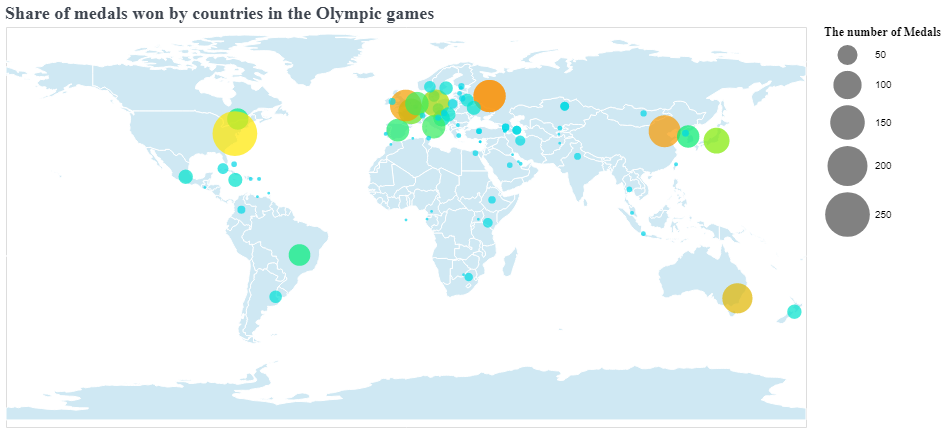

In [12]:
slider = alt.binding_range(min=1896, max=2012, step=4, name='Year:')
select_year = alt.selection_single(name="Year", fields=['Year'], bind=slider, init={'Year': 2012})

countries = alt.topo_feature(data.world_110m.url, 'countries')
country_selection = alt.selection_single(name="Country_Name", fields=['Country_Name'], on='mouseover')

geomap = alt.Chart(countries).mark_geoshape(
    fill='#cfe8f3',
    stroke='white'
).encode(
    tooltip = alt.Tooltip(['Country_Name:N', 'id:N', 'continent:N']),
        color = alt.condition(country_selection, 
                          alt.value('#cfe8f3'), alt.value('#0a4c6a'), 
                          title = 'continent', 
                          legend = None),
).transform_lookup(
    lookup="id",
    from_ = alt.LookupData(ids, 'Country_Number', ['Country_Name', 'continent'])
).add_selection(
  country_selection
).properties(
    width=800,
    height=400
).project(
    type='equirectangular'
)

points = alt.Chart(new_ids).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    color = alt.Color('Quantity:Q', scale = alt.Scale(range = ["#00D5E9", "#7FEB00", "#FF5872", "#FFE700"]), legend = None),
    size=alt.Size('Quantity:Q',scale=alt.Scale(range=[0, 2000]), legend=alt.Legend(title="The number of Medals", titleFont='Lato Regular Italic', titleFontSize=12)),
    tooltip=['Year', 'Country_Name', 'Quantity']
).add_selection( 
    select_year
).transform_filter(
    select_year
).properties(
    width=800,
    height=400,
    title = alt.TitleParams(text = 'Share of medals won by countries in the Olympic games', anchor='start',
                            font = 'Lato Bold', fontSize = 18, color = '#3E454F')
)
geomap + points